<a href="https://colab.research.google.com/github/Phani097/GEN-AI-AND-CHATGPT/blob/main/GEN%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('housing.csv')

Saving housing.csv to housing.csv



Dataset Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude

Total number of houses: 20640

Starting training...
Epoch 1/500, Loss: $6.60k
Epoch 51/500, Loss: $0.82k
Epoch 101/500, Loss: $0.59k
Epoch 151/500, Loss: $0.53k
Epoch 201/500, Loss: $0.49k
Epoch 251/500, Loss: $0.47k
Epoch 301/500, Loss: $0.46k
Epoch 351/500, Loss: $0.44k
Epoch 401/500, Loss: $0.45k
Epoch 451/500, Loss: $0.43k


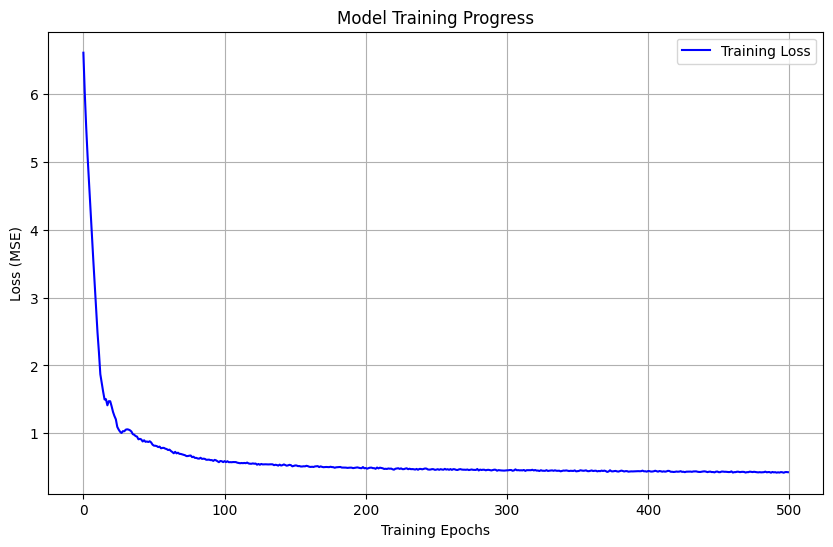


Model Performance Metrics:
Mean Squared Error: $0.33k
Mean Absolute Error: $0.39k
R² Score: 74.74%

Sample Predictions vs Actual Prices:
House #1:
  Predicted Price: $0.78k
  Actual Price: $0.48k
  Difference: $0.30k
House #2:
  Predicted Price: $1.40k
  Actual Price: $0.46k
  Difference: $0.94k
House #3:
  Predicted Price: $4.29k
  Actual Price: $5.00k
  Difference: $0.71k
House #4:
  Predicted Price: $2.42k
  Actual Price: $2.19k
  Difference: $0.23k
House #5:
  Predicted Price: $2.79k
  Actual Price: $2.78k
  Difference: $0.01k


In [ ]:
"""
California Housing Price Predictor
--------------------------------
This model predicts house prices in California using a neural network.
It uses features like location, income, rooms, etc. to make predictions.

Author: Your Name
Date: March 2, 2025
"""

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

torch.manual_seed(42)
np.random.seed(42)

def load_and_prepare_data():
    """
    Load the California housing dataset and prepare it for training.
    Returns processed training and testing data.
    """
    housing_data = fetch_california_housing()

    feature_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
    house_prices = np.array(housing_data.target, dtype=np.float32).reshape(-1, 1)

    print(f"\nDataset Features:")
    for feature in housing_data.feature_names:
        print(f"- {feature}")
    print(f"\nTotal number of houses: {len(feature_df)}")

    feature_scaler = StandardScaler()
    normalized_features = feature_scaler.fit_transform(feature_df.values)

    X_train, X_test, y_train, y_test = train_test_split(
        normalized_features,
        house_prices,
        test_size=0.2,
        random_state=42
    )

    train_features = torch.from_numpy(X_train).float()
    train_prices = torch.from_numpy(y_train).float()
    test_features = torch.from_numpy(X_test).float()
    test_prices = torch.from_numpy(y_test).float()

    return train_features, train_prices, test_features, test_prices

class HousePricePredictor(nn.Module):
    """
    Neural network model for predicting house prices.
    Uses multiple layers with dropout for better generalization.
    """
    def __init__(self, num_features):
        super(HousePricePredictor, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1)
        )

    def forward(self, features):
        """Make predictions based on input features."""
        return self.network(features)

def train_model(model, train_features, train_prices, num_epochs=500, learning_rate=0.005):
    """
    Train the neural network model.
    Returns training loss history.
    """
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_losses = []

    print("\nStarting training...")
    for epoch in range(num_epochs):
        model.train()

        optimizer.zero_grad()

        price_predictions = model(train_features)
        loss = loss_function(price_predictions, train_prices)

        loss.backward()
        optimizer.step()

        training_losses.append(loss.item())

        if epoch % 50 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: ${loss.item():.2f}k")

    return training_losses

def evaluate_model(model, test_features, test_prices):
    """
    Evaluate the model's performance on test data.
    Prints various metrics and sample predictions.
    """
    model.eval()
    with torch.no_grad():
        predicted_prices = model(test_features).numpy()
        actual_prices = test_prices.numpy()

        mse = np.mean((predicted_prices - actual_prices) ** 2)
        mae = mean_absolute_error(actual_prices, predicted_prices)
        r2 = r2_score(actual_prices, predicted_prices)

        print("\nModel Performance Metrics:")
        print(f"Mean Squared Error: ${mse:.2f}k")
        print(f"Mean Absolute Error: ${mae:.2f}k")
        print(f"R² Score: {r2:.2%}")

        print("\nSample Predictions vs Actual Prices:")
        for i in range(5):
            print(f"House #{i+1}:")
            print(f"  Predicted Price: ${predicted_prices[i][0]:.2f}k")
            print(f"  Actual Price: ${actual_prices[i][0]:.2f}k")
            print(f"  Difference: ${abs(predicted_prices[i][0] - actual_prices[i][0]):.2f}k")

def plot_training_progress(losses):
    """
    Visualize the training progress over time.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label="Training Loss", color='blue')
    plt.xlabel("Training Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title("Model Training Progress")
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    """
    Main function to run the entire training and evaluation process.
    """
    train_features, train_prices, test_features, test_prices = load_and_prepare_data()

    model = HousePricePredictor(num_features=train_features.shape[1])
    training_losses = train_model(model, train_features, train_prices)

    plot_training_progress(training_losses)

    evaluate_model(model, test_features, test_prices)

if __name__ == "__main__":
    main()
